In [41]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam



In [3]:
data = yf.download('GLD', '2022-01-01', '2024-03-03', auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,168.860001,169.009995,168.000000,168.330002,9014400
2022-01-04,168.899994,169.720001,168.729996,169.570007,6965600
2022-01-05,170.619995,170.929993,168.899994,169.059998,8715600
2022-01-06,167.160004,167.750000,166.860001,166.990005,10902700
2022-01-07,167.369995,168.009995,166.860001,167.750000,8191900
...,...,...,...,...,...
2024-02-26,187.789993,188.360001,187.529999,188.199997,4491900
2024-02-27,188.580002,188.720001,187.880005,188.000000,5165400
2024-02-28,188.339996,188.520004,188.029999,188.339996,2824100


In [5]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,168.860001,169.009995,168.000000,168.330002,9014400
2022-01-04,168.899994,169.720001,168.729996,169.570007,6965600
2022-01-05,170.619995,170.929993,168.899994,169.059998,8715600
2022-01-06,167.160004,167.750000,166.860001,166.990005,10902700
2022-01-07,167.369995,168.009995,166.860001,167.750000,8191900


In [6]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-02-26,187.789993,188.360001,187.529999,188.199997,4491900
2024-02-27,188.580002,188.720001,187.880005,188.000000,5165400
2024-02-28,188.339996,188.520004,188.029999,188.339996,2824100
2024-02-29,189.639999,189.919998,189.229996,189.309998,6848600
2024-03-01,190.270004,193.399994,189.440002,192.889999,13404800


In [7]:
integer_columns = data.select_dtypes(include=['int']).columns
if not integer_columns.empty:
    print("\nInteger columns found:")
    print(integer_columns)
    data[integer_columns] = data[integer_columns].astype(float)


Integer columns found:
Index(['Volume'], dtype='object')


In [8]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,168.860001,169.009995,168.000000,168.330002,9014400.0
2022-01-04,168.899994,169.720001,168.729996,169.570007,6965600.0
2022-01-05,170.619995,170.929993,168.899994,169.059998,8715600.0
2022-01-06,167.160004,167.750000,166.860001,166.990005,10902700.0
2022-01-07,167.369995,168.009995,166.860001,167.750000,8191900.0
...,...,...,...,...,...
2024-02-26,187.789993,188.360001,187.529999,188.199997,4491900.0
2024-02-27,188.580002,188.720001,187.880005,188.000000,5165400.0
2024-02-28,188.339996,188.520004,188.029999,188.339996,2824100.0


(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04')])

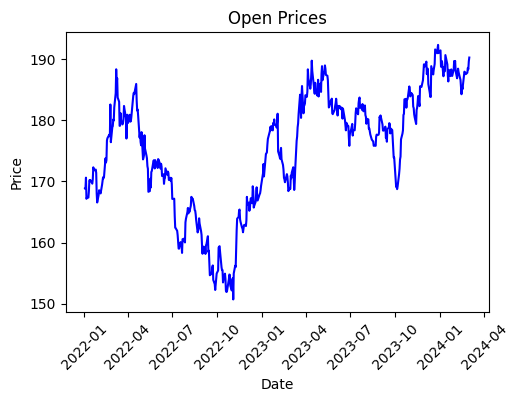

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(data['Open'], color='blue')
plt.title('Open Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04')])

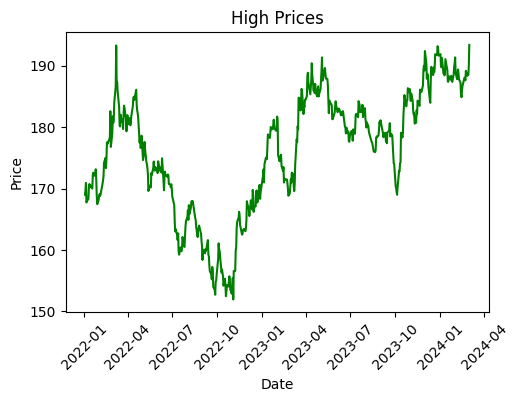

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 2)
plt.plot(data['High'], color='green')
plt.title('High Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45) 

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04')])

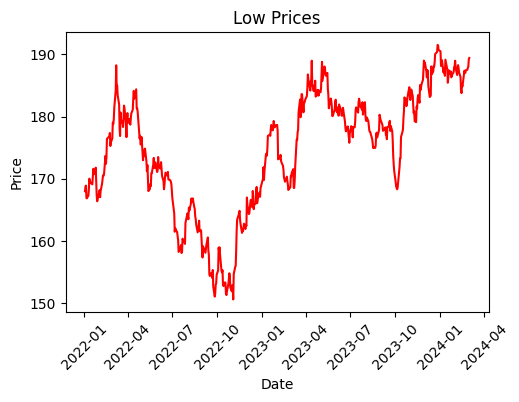

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.plot(data['Low'], color='red')
plt.title('Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723., 19814.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04')])

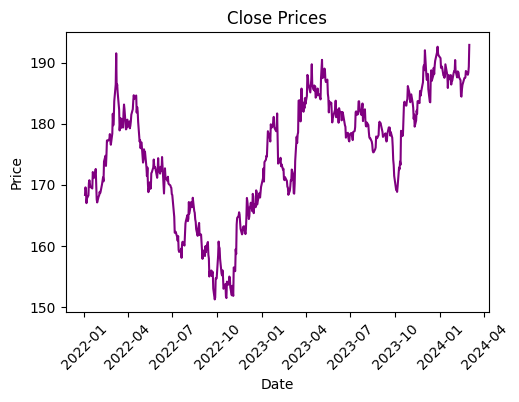

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
plt.plot(data['Close'], color='purple')
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

In [13]:
features = ['Open', 'High', 'Low']
target = 'Close'

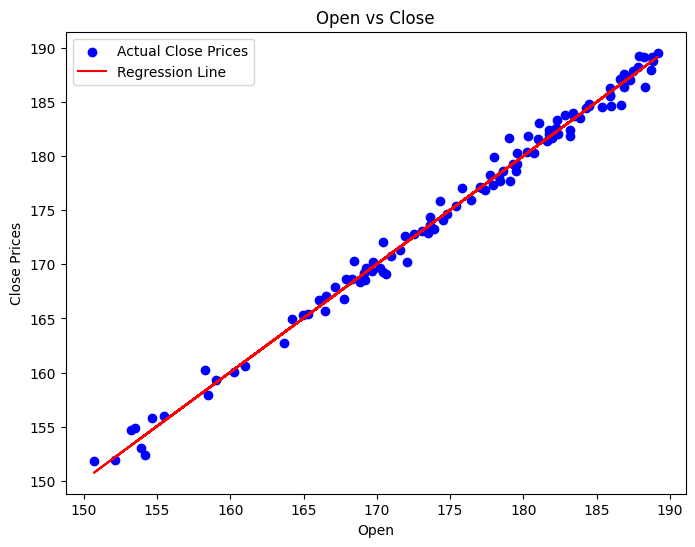

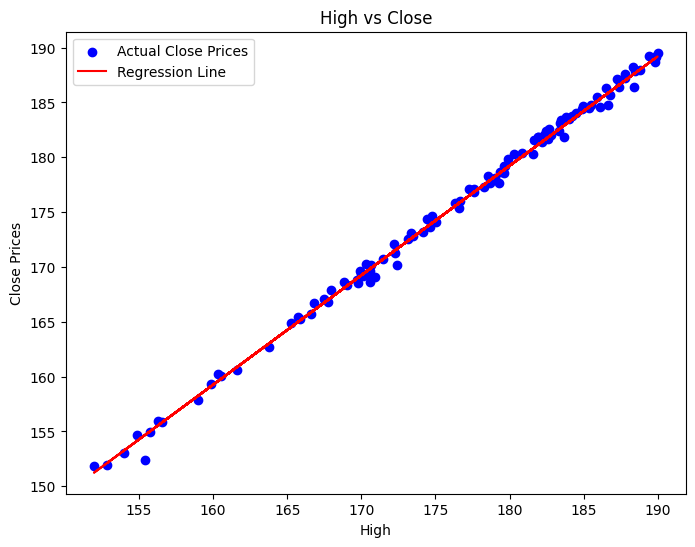

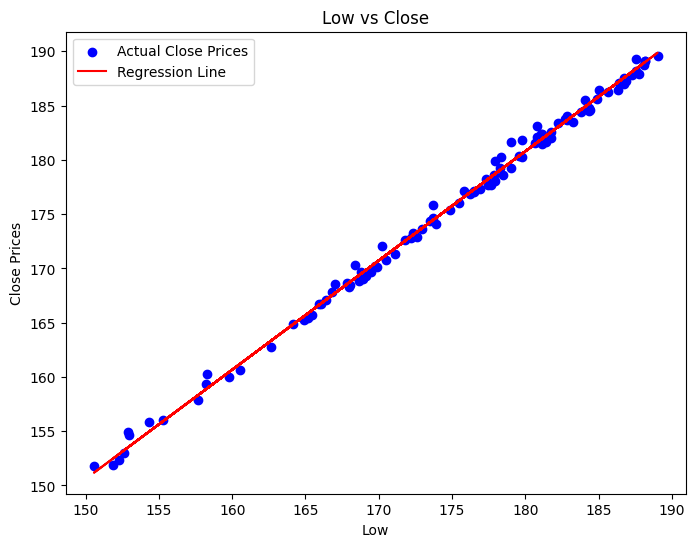

In [14]:
for feature in features:
    X = data[[feature]].values.reshape(-1, 1)
    y = data[target]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   
    model = LinearRegression()
    model.fit(X_train, y_train)

   
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Close Prices')
    plt.plot(X_test, y_pred, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Close Prices')
    plt.title(f'{feature} vs Close')
    plt.legend()
    plt.show()


In [15]:
for feature in features:
    if feature not in data.columns:
        print(f"Column '{feature}' not found in the DataFrame.")
        continue

    X = data[[feature]].values.reshape(-1, 1)
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Performance metrics for {feature}:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared Score: {r2}")
    print()

Performance metrics for Open:
Mean Squared Error: 0.7757582304859167
Mean Absolute Error: 0.6826323971216542
R-squared Score: 0.9920330887749493

Performance metrics for High:
Mean Squared Error: 0.297711997651398
Mean Absolute Error: 0.42987191023784427
R-squared Score: 0.9969425460630492

Performance metrics for Low:
Mean Squared Error: 0.33371691706059886
Mean Absolute Error: 0.44904562616379307
R-squared Score: 0.9965727813795104



In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))#data preparation


In [102]:
window_size = 60

In [103]:
X, y = [], []
for i in range(len(scaled_data) - window_size):
    X.append(scaled_data[i:i+window_size])
    y.append(scaled_data[i+window_size])

X, y = np.array(X), np.array(y) #input sequences and target sequences

In [104]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]#training and testing sets

In [105]:
best_units = 100  # Example value, replace with the best value found
best_dropout_rate = 0.2  # Example value, replace with the best value found

In [138]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

In [139]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [141]:
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0031
Epoch 2/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0028
Epoch 3/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0026
Epoch 4/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0025
Epoch 5/100
13/13 [==============================] - 1s 68ms/step - loss: 0.0029
Epoch 6/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0024
Epoch 7/100
13/13 [==============================] - 1s 63ms/step - loss: 0.0028
Epoch 8/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0026
Epoch 9/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0023
Epoch 10/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0027
Epoch 11/100
13/13 [==============================] - 1s 64ms/step - loss: 0.0025
Epoch 12/100
13/13 [==============================] - 1s 67ms/step - loss: 0.0030
Epoch 13/100
13/13 [=====

In [147]:
sample_data = X_test[0].reshape(1, window_size, 1)
sample_prediction = model.predict(sample_data)
sample_prediction = scaler.inverse_transform(sample_prediction)


1/1 [==============================] - 0s 20ms/step


In [148]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 0s 13ms/step


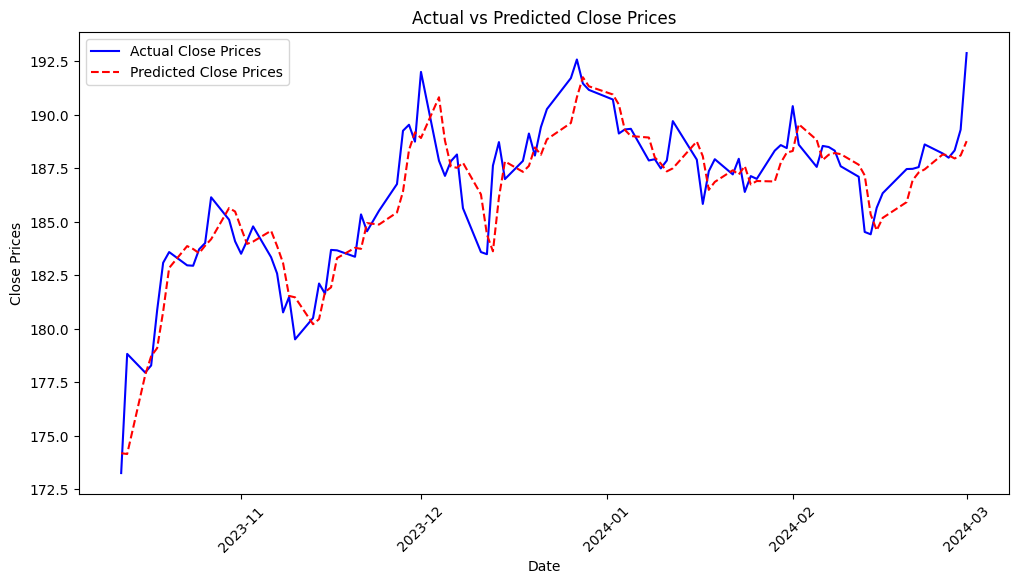

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[split_index+window_size:], data['Close'][split_index+window_size:], label='Actual Close Prices', color='blue')
plt.plot(data.index[split_index+window_size:], predictions, label='Predicted Close Prices', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [150]:
print("Prediction for a single sample data point:", sample_prediction)

Prediction for a single sample data point: [[174.1891]]


In [151]:
y_pred = model.predict(X_test)

y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
r2 = r2_score(y_test_inverse, y_pred_inverse)
print("R-squared (R2) Score:", r2)

4/4 [==============================] - 0s 15ms/step
R-squared (R2) Score: 0.8183800121956171
